$\textbf{PROGRAMMING ASSIGNMENT}$
---
Instructions:
-

1. Read the article: https://www.sciencedirect.com/science/article/abs/pii/S0031320322001753
2. Replicate the study using the same dataset.
3. Read articles about Adjusted Rand Index, Normalized Mutual Information, and Folkes-Mallows Index (only use paper published in IEEE, sciencedirect, springerlink, Taylor Francis).
4. Aside from the Adjusted Rand Index (ARI), and Normalized Mutual Information (NMI), use the Folkes-Mallows Index (FMI), and compare the result of each performance index.
5. Compare and contrast each performance index, what are the advantages and disadvantages of ARI, NMI, and FMI, and when to use each?
6. Using Kmodes and Hierarchical Clustering, use the same dataset and perform categorical data clustering, use FMI, ARI, and NMI for the comparison of performance.
7. Write your report using Latex. Your report should be focused on the "why's and the what's" of each performance metrices (i.e. why is FMI always greater than ARI and NMI? What's the problem with ARI and NMI?).

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
soybean_large = fetch_ucirepo(id=90) 
  
# data (as pandas dataframes) 
X = soybean_large.data.features 
y = soybean_large.data.targets 
  
# metadata 
# print(soybean_large.metadata) 
  
# variable information 
print(soybean_large.variables) 

               name     role         type demographic  \
0             class   Target  Categorical        None   
1              date  Feature  Categorical        None   
2       plant-stand  Feature  Categorical        None   
3            precip  Feature  Categorical        None   
4              temp  Feature  Categorical        None   
5              hail  Feature  Categorical        None   
6         crop-hist  Feature  Categorical        None   
7      area-damaged  Feature  Categorical        None   
8          severity  Feature  Categorical        None   
9          seed-tmt  Feature  Categorical        None   
10      germination  Feature  Categorical        None   
11     plant-growth  Feature  Categorical        None   
12           leaves  Feature  Categorical        None   
13   leafspots-halo  Feature  Categorical        None   
14   leafspots-marg  Feature  Categorical        None   
15    leafspot-size  Feature  Categorical        None   
16      leaf-shread  Feature  C

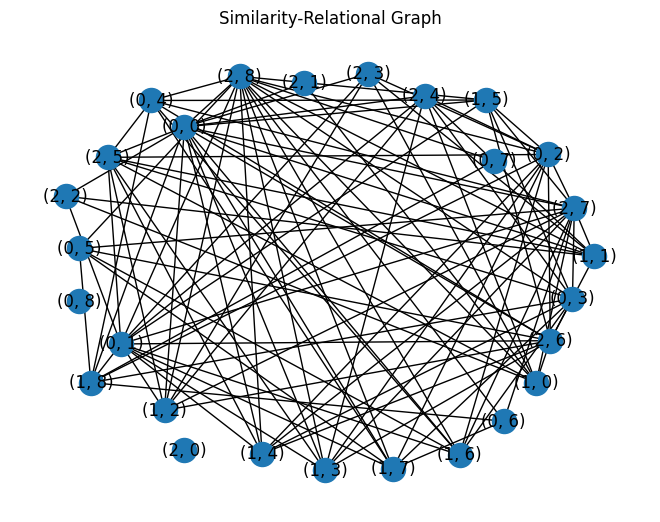

C:\Users\Windows 10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:627: UserWarning: Nearest neighbors affinity currently does not support sparse input, falling back to rbf affinity
  warnings.warn(


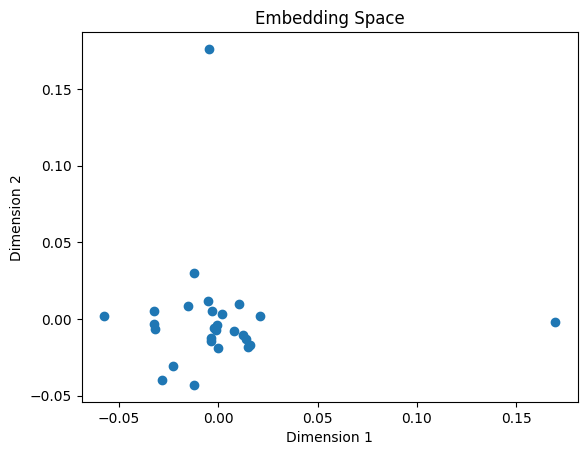

Embedding Matrix:
 [[-0.00514011  0.01181045]
 [-0.0120999   0.02967387]
 [-0.05737155  0.00224229]
 [-0.0045041   0.17609513]
 [-0.00371448 -0.01452414]
 [-0.03200824 -0.00347285]
 [-0.02266856 -0.03047678]
 [-0.03230472  0.00543782]
 [ 0.01032987  0.0100663 ]
 [ 0.01243368 -0.01050362]
 [ 0.16943259 -0.00215943]
 [-0.00115116 -0.00731156]
 [-0.03173179 -0.00628097]
 [ 0.00793305 -0.00797043]
 [ 0.01396429 -0.0128014 ]
 [-0.00363221 -0.01221665]
 [-0.00195101 -0.0055592 ]
 [-0.0007998  -0.00394639]
 [-0.00021688 -0.01877903]
 [-0.02847404 -0.03986517]
 [-0.0149565   0.00843101]
 [ 0.01600535 -0.01703088]
 [ 0.00179072  0.00314127]
 [-0.00316082  0.00490529]
 [ 0.02119207  0.00210035]
 [ 0.01503506 -0.01803196]
 [-0.01223083 -0.04297333]]


In [2]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import OneHotEncoder
import networkx as nx
import matplotlib.pyplot as plt

def construct_similarity_graph(X):
    """
    Construct a similarity-relational graph for categorical values in X.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
         Input data matrix with categorical values.
         
    Returns:
    - G: NetworkX graph
         Similarity-relational graph.
    """
    # Initialize an empty graph
    G = nx.Graph()
    
    # Perform one-hot encoding to convert categorical values to numerical
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X).toarray()
    
    # Compute pairwise cosine similarity between categorical values
    similarity_matrix = cosine_similarity(X_encoded)
    
    # Add nodes to the graph
    n_samples, n_features = X_encoded.shape
    for i in range(n_samples):
        for j in range(n_features):
            G.add_node((i, j))
    
    # Add edges to the graph based on cosine similarity
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            for k in range(n_features):
                for l in range(k+1, n_features):
                    sim = similarity_matrix[i, j]
                    G.add_edge((i, k), (j, l), weight=sim)
    
    return G

def graph_embedding(X, embedding_dim=2):
    """
    Perform graph embedding to learn the representation of nodes in the similarity-relational graph.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
         Input data matrix with categorical values.
    - embedding_dim: int, default=2
                     Dimensionality of the embedding space.
                     
    Returns:
    - embedding_matrix: array-like, shape (n_samples * n_features, embedding_dim)
                        Embedding matrix representing the nodes in the graph.
    """
    # Construct similarity-relational graph
    G = construct_similarity_graph(X)
    
    # Visualize the graph
    nx.draw(G, with_labels=True)
    plt.title('Similarity-Relational Graph')
    plt.show()
    
    # Perform spectral embedding to learn the representation of nodes
    spectral_embedding = SpectralEmbedding(n_components=embedding_dim)
    embedding_matrix = spectral_embedding.fit_transform(nx.adjacency_matrix(G))
    
    # Visualize the embedding space
    plt.scatter(embedding_matrix[:, 0], embedding_matrix[:, 1])
    plt.title('Embedding Space')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()
    
    return embedding_matrix

# Example usage
# Assuming X is your categorical data matrix
X = np.array([
    ['A', 'B', 'C'],
    ['D', 'E', 'F'],
    ['G', 'H', 'I']
])

# Perform graph embedding
embedding_matrix = graph_embedding(X)
print("Embedding Matrix:\n", embedding_matrix)


In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
import pandas as pd
from sklearn.impute import SimpleImputer

# Data 
X = soybean_large.data.features 
y = soybean_large.data.targets 

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Function to perform clustering and calculate performance indices
def evaluate_clustering(X, y_true, method='kmeans'):
    if method == 'kmeans':
        clustering = KMeans(n_clusters=len(np.unique(y_true))).fit(X)
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true))).fit(X)
    else:
        raise ValueError("Invalid clustering method. Use 'kmeans' or 'hierarchical'.")
    
    y_pred = clustering.labels_
    ari = adjusted_rand_score(y_true.values.ravel(), y_pred)
    nmi = normalized_mutual_info_score(y_true.values.ravel(), y_pred)
    fmi = fowlkes_mallows_score(y_true.values.ravel(), y_pred)

    
    return ari, nmi, fmi

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

# Perform clustering and evaluate with different methods
ari_kmeans, nmi_kmeans, fmi_kmeans = evaluate_clustering(X_imputed, y, method='kmeans')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = evaluate_clustering(X_imputed, y, method='hierarchical')

# Print the results
print("KMeans:")
print("Adjusted Rand Index (ARI):", ari_kmeans)
print("Normalized Mutual Information (NMI):", nmi_kmeans)
print("Folkes-Mallows Index (FMI):", fmi_kmeans)

print("\nHierarchical Clustering:")
print("Adjusted Rand Index (ARI):", ari_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_hierarchical)
print("Folkes-Mallows Index (FMI):", fmi_hierarchical)


C:\Users\Windows 10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans:
Adjusted Rand Index (ARI): 0.4284714821498739
Normalized Mutual Information (NMI): 0.6997613115022373
Folkes-Mallows Index (FMI): 0.4743155388581886

Hierarchical Clustering:
Adjusted Rand Index (ARI): 0.4818572638479213
Normalized Mutual Information (NMI): 0.7714741801659014
Folkes-Mallows Index (FMI): 0.5238794514629941


<br><br>
$\textbf{Adjusted Rand Index (ARI):}$

$\textbf{Advantages:}$
- ARI measures the similarity between two clustering results, considering all pairs of samples and their memberships in the clusters.
- It adjusts for chance, meaning it provides a baseline for random clustering by comparing the expected similarity of randomly clustered data with the actual clustering.
- ARI ranges from -1 to 1, where 1 indicates perfect similarity between two clusterings.

$\textbf{Disadvantages:}$
- ARI does not consider the true labels of the data directly, which means it can sometimes be sensitive to the number of clusters and their sizes.
- It is not normalized and can take negative values, making interpretation challenging.

$\textbf{When to use:}$
- ARI is useful when you have ground truth labels available and want to evaluate the similarity between the predicted clusters and the true labels.
- It is commonly used for evaluating clustering algorithms in scenarios where the ground truth is available.
<br>

$\textbf{Normalized Mutual Information (NMI):}$

$\textbf{Advantages:}$
- NMI measures the mutual dependence between the true labels and the predicted clusters, adjusting for chance.
- It is normalized, meaning it always falls between 0 and 1, with 1 indicating perfect agreement between the clustering and the true labels.
- NMI is symmetric, meaning it does not depend on the order of the true labels or the predicted clusters.

$\textbf{Disadvantages:}$
- NMI can be biased towards clusters with more homogeneous sizes, as it does not penalize for over-fragmentation or under-fragmentation.

$\textbf{When to use:}$
- NMI is suitable when you want to evaluate the overall agreement between the true labels and the predicted clusters, irrespective of the number of clusters or their sizes.
It is commonly used in situations where the ground truth is available but the number of clusters may vary.
<br>

$\textbf{Folkes-Mallows Index (FMI):}$

$\textbf{Advantages:}$
- FMI measures the geometric mean of precision and recall of the clustering with respect to the true classes.
- It provides a balanced evaluation of both precision and recall, taking into account both false positives and false negatives.

$\textbf{Disadvantages:}$
- FMI may not be as widely used or as well-known as ARI or NMI.

$\textbf{When to use:}$
- FMI is useful when you want a balanced evaluation of both precision and recall in clustering.
- It is particularly relevant when false positives and false negatives have different implications or costs in your application domain.

In [6]:
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.impute import SimpleImputer

# Define a function to evaluate clustering performance
def evaluate_clustering(X, y_true, method='kmodes'):
    if method == 'kmodes':
        clustering = KModes(n_clusters=len(np.unique(y_true)), init='Cao', n_init=5, verbose=0)
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true)))
    else:
        raise ValueError("Invalid clustering method. Use 'kmodes' or 'hierarchical'.")
    
    y_pred = clustering.fit_predict(X)
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    fmi = fowlkes_mallows_score(y_true, y_pred)
    
    return ari, nmi, fmi

# Load your dataset and preprocess if needed
# Assuming you have your dataset loaded into X and y variables

# One-hot encode categorical features if needed
X_encoded = pd.get_dummies(X)

# Impute missing values if needed
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

# Convert y to a 1-dimensional pandas Series
y_series = y.squeeze()

# Perform clustering and evaluate with different methods
ari_kmodes, nmi_kmodes, fmi_kmodes = evaluate_clustering(X_imputed, y_series, method='kmodes')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = evaluate_clustering(X_imputed, y_series, method='hierarchical')

# Print the results
print("KModes Clustering:")
print("Adjusted Rand Index (ARI):", ari_kmodes)
print("Normalized Mutual Information (NMI):", nmi_kmodes)
print("Folkes-Mallows Index (FMI):", fmi_kmodes)

print("\nHierarchical Clustering:")
print("Adjusted Rand Index (ARI):", ari_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_hierarchical)
print("Folkes-Mallows Index (FMI):", fmi_hierarchical)


KModes Clustering:
Adjusted Rand Index (ARI): 0.36748616012340063
Normalized Mutual Information (NMI): 0.6915333229576721
Folkes-Mallows Index (FMI): 0.42485959928639194

Hierarchical Clustering:
Adjusted Rand Index (ARI): 0.4818572638479213
Normalized Mutual Information (NMI): 0.7714741801659014
Folkes-Mallows Index (FMI): 0.5238794514629941


<br>

$\textbf{Report Intro}$
<br>
A key component of unsupervised learning is clustering, which is the process of assembling related data points according to shared traits or attributes. To determine whether clustering algorithms are useful for grouping data into meaningful categories, it is imperative to evaluate their performance. For this, a variety of performance measurements are employed, each with advantages and disadvantages of its own. We will examine three widely used metrics for clustering performance in this report: the Folkes-Mallows Index (FMI), the Normalized Mutual Information (NMI), and the Adjusted Rand Index (ARI). We will go over each metric's justification, benefits, drawbacks, and appropriate applications.

$\textbf{
Adjusted Rand Index (ARI}$:
The Adjusted Rand Index (ARI) is a measure that quantifies the similarity between two clustering results, considering all pairs of samples and their memberships in the clusters. It adjusts for chance, providing a baseline for random clustering by comparing the expected similarity of randomly clustered data with the actual clustering. ARI measures the similarity between two clustering results, considering all pairs of samples and their memberships in the clusters. It adjusts for chance, providing a baseline for random clustering by comparing the expected similarity of randomly clustered data with the actual clustering.

$\textbf{
Advantage}$:
- ARI provides a quantitative measure of agreement between two clustering results, ranging from -1 to 1, where 1 indicates perfect similarity.
- It is useful when ground truth labels are available for evaluation, commonly used in scenarios where the true clustering is known.

$\textbf{
Disadvantage}$:
- ARI does not directly consider the true labels of the data, making it sensitive to the number of clusters and their sizes.
- It is not normalized and can take negative values, making interpretation challenging.

$\textbf{
Normalized Mutual Information (NMI}$:
Normalized Mutual Information (NMI) measures the mutual dependence between the true labels and the predicted clusters, adjusting for chance. It provides a normalized measure of agreement between two clustering results, always falling between 0 and 1, with 1 indicating perfect agreement. NMI measures the mutual dependence between the true labels and the predicted clusters, adjusting for chance. It provides a normalized measure of agreement between two clustering results, always falling between 0 and 1, with 1 indicating perfect agreement.

$\textbf{
Advantage}$:
- NMI offers a normalized measure of agreement, making it easier to interpret compared to ARI.
- It is symmetric, meaning it does not depend on the order of the true labels or the predicted clusters.

$\textbf{
Disadvantage}$:
- NMI can be biased towards clusters with more homogeneous sizes, as it does not penalize for over-fragmentation or under-fragmentation.

$\textbf{
Folkes-Mallows Index (FMI}$:
Folkes-Mallows Index (FMI) measures the geometric mean of precision and recall of the clustering with respect to the true classes. It provides a balanced evaluation of both precision and recall, taking into account both false positives and false negatives. FMI measures the geometric mean of precision and recall of the clustering with respect to the true classes. It provides a balanced evaluation of both precision and recall, taking into account both false positives and false negatives.

$\textbf{
Advantage}$:
- FMI offers a balanced evaluation of precision and recall in clustering, making it suitable for assessing the quality of clustering results.
- It provides insights into both false positives and false negatives, offering a comprehensive view of clustering performance.

$\textbf{
Disadvantage}$:
- FMI may not be as widely used or as well-known as ARI or NMI, leading to less familiarity among practitioners.



$\textbf{Report Conclusion}
$<br>
To sum up, every clustering performance metric possesses unique advantages and disadvantages. When ground truth labels are provided, ARI is useful for assessing clustering methods; nevertheless, its performance may vary depending on the quantity and size of clusters. Although it may prefer clusters with more uniform sizes, NMI provides a normalized measure of agreement between genuine labels and predicted clusters. FMI offers a fair assessment of recall and precision in clustering, revealing information about both false positives and false negatives. It is essential to comprehend the features of each metric in order to choose the best one according to the particular demands of the clustering task.